# Chapter 8. Exploratory data analysis
## Notebook for Python

### 8.1 Simple exploratory data analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
#Load clean data
#Data preparation in cleaning_eurobarometer_py.ipynb
url='http://cssbook.net/d/eurobarometer_nov_2017.csv'
d2=pd.read_csv(url, header=0, sep= ',', low_memory= False)
print('Shape of my filtered data =', d2.shape)
print("Variables:", d2.columns)

Shape of my filtered data = (33193, 17)
Variables: Index(['survey', 'uniqid', 'date', 'country', 'marital_status', 'educational',
       'gender', 'age', 'occupation', 'type_community',
       'household_composition', 'support_refugees', 'support_migrants',
       'date_n', 'support_refugees_n', 'support_migrants_n', 'educational_n'],
      dtype='object')


In [5]:
print(d2['gender'].value_counts())
print(d2['gender'].value_counts(normalize=True))

Woman    17716
Man      15477
Name: gender, dtype: int64
Woman    0.533727
Man      0.466273
Name: gender, dtype: float64


In [15]:
print(d2['support_refugees'].value_counts())
print(d2['support_refugees'].value_counts(normalize=True,dropna=False))

Tend to agree       12695
Tend to disagree     5391
Totally agree        4957
Totally disagree     3574
Name: support_refugees, dtype: int64
Tend to agree       0.382460
NaN                 0.198114
Tend to disagree    0.162414
Totally agree       0.149339
Totally disagree    0.107673
Name: support_refugees, dtype: float64


In [4]:
print("Number of missing values in the variable support_refugees:", d2['support_refugees'].isna().sum())

d2 = d2.dropna()
print("Shape of my data without missing values", d2.shape)

Number of missing values in the variable support_refugees: 6576
Shape of my data without missing values (23448, 17)


In [5]:
print("Crosstab gender and support_refugees:")
print(pd.crosstab(d2['support_refugees'], d2['gender']))

print("Summary statistics for group of cases:")
print(d2.groupby(['support_refugees', 'gender'])['age'].mean())

Crosstab gender and support_refugees:
gender             Man  Woman
support_refugees             
Tend to agree     5067   5931
Tend to disagree  2176   2692
Totally agree     2118   2178
Totally disagree  1524   1762
Summary statistics for group of cases:
support_refugees  gender
Tend to agree     Man       54.073022
                  Woman     53.373799
Tend to disagree  Man       52.819853
                  Woman     52.656761
Totally agree     Man       53.738905
                  Woman     52.421947
Totally disagree  Man       52.368110
                  Woman     53.203746
Name: age, dtype: float64


### 8.2 Visualizing data

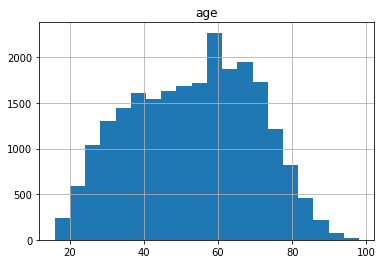

In [6]:
import matplotlib.pyplot as plt
import numpy as np
d2.hist(column='age', bins=20)
plt.show()

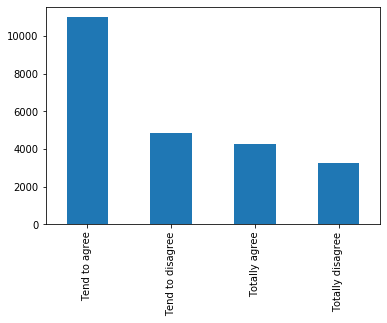

In [7]:
d2['support_refugees'].value_counts().plot(kind='bar')
plt.show()

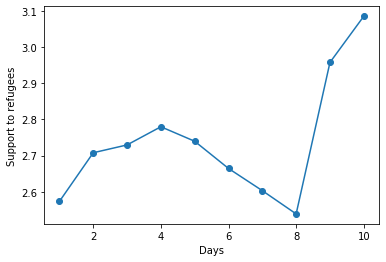

In [8]:
mean_support_refugees_by_day = d2.groupby(['date_n'])['support_refugees_n'].mean()
mean_support_refugees_by_day= mean_support_refugees_by_day.to_frame()

plt.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
plt.xlabel('Days')
plt.ylabel('Support to refugees')
plt.show()

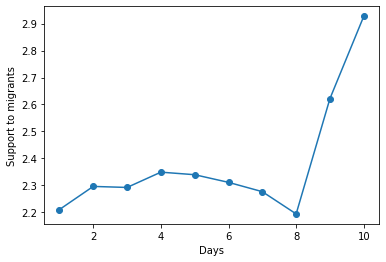

In [9]:
mean_support_migrants_by_day = d2.groupby(['date_n'])['support_migrants_n'].mean()
mean_support_migrants_by_day= mean_support_migrants_by_day.to_frame()

plt.plot(mean_support_migrants_by_day.index, mean_support_migrants_by_day['support_migrants_n'], marker='o')
plt.xlabel('Days')
plt.ylabel('Support to migrants')
plt.show()

In [10]:
#Combine the figures using function subplots()
#fig, (ax1, ax2) = plt.subplots(1,2)
#plt.subplots_adjust(wspace=0.5)
#ax1.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
#ax1.set(xlabel='Day', ylabel='Support to refugees')
#ax2.plot(mean_support_refugees_by_day.index, mean_support_refugees_by_day['support_refugees_n'], marker='o')
#ax2.set(xlabel='Day', ylabel='Support to migrants')
#plt.show()

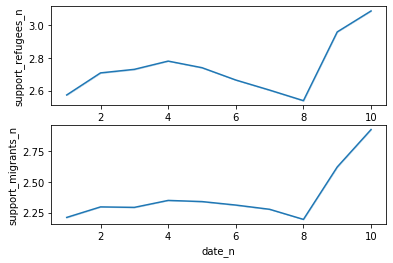

In [11]:
import seaborn as sns
f, axes = plt.subplots(2,1)
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, ci=0, ax=axes[0])
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, ci=0, ax=axes[1])
plt.show()

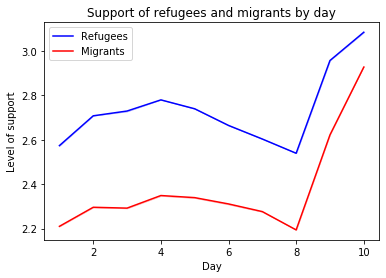

In [12]:
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, color="blue", ci=0, label="Refugees")
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, color="red", ci=0, label="Migrants")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support of refugees and migrants by day") 
plt.show()

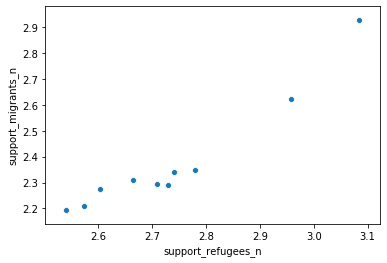

In [13]:
supports = pd.concat([mean_support_refugees_by_day,mean_support_migrants_by_day], axis=1) #Create a DF of means
sns.scatterplot(x="support_refugees_n", y="support_migrants_n", data=supports)

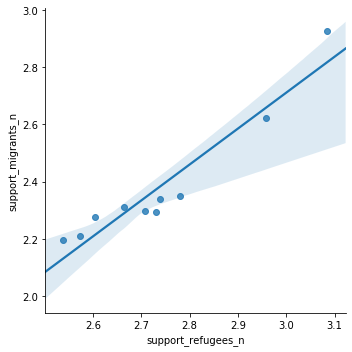

In [14]:
sns.lmplot(x="support_refugees_n", y="support_migrants_n", data=supports)
plt.show()

In [15]:
#
print(supports['support_refugees_n'].corr(supports['support_migrants_n'], method='pearson'))

0.9541243084907629


In [16]:
pivot_data = pd.pivot_table(d2, values='support_refugees_n', index=['country'], columns='gender')

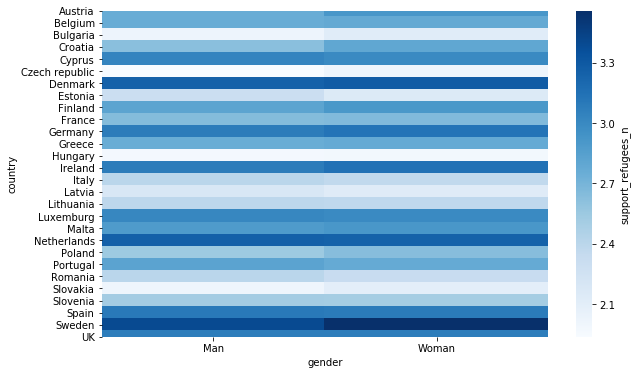

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_data, cmap='Blues', cbar_kws={'label': 'support_refugees_n'}) #annot=True for labels
plt.show()

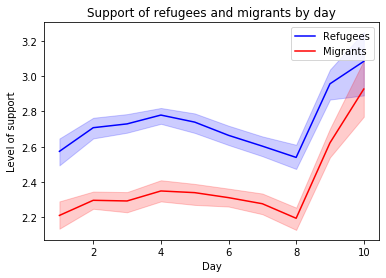

In [18]:
sns.lineplot(x="date_n", y='support_refugees_n', data=d2, color="blue", ci=100, label="Refugees")
sns.lineplot(x="date_n", y='support_migrants_n', data=d2, color="red", ci=100, label="Migrants")
plt.xlabel("Day")
plt.ylabel("Level of support")
plt.title("Support of refugees and migrants by day") 
plt.show()

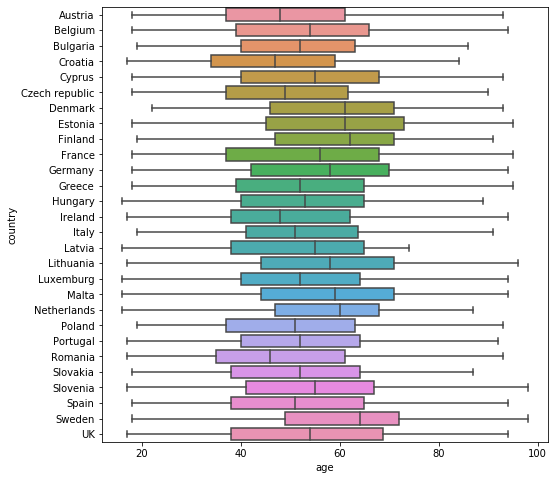

In [19]:
d2 = d2.sort_values(by ='country' )
plt.figure(figsize=(8,8))
sns.boxplot(x="age", y="country", data=d2)
plt.show()

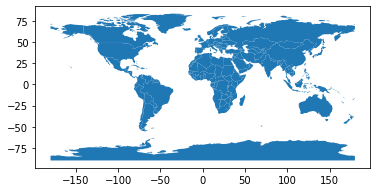

In [20]:
import geopandas as gpd
#Generate dataframe with average level of support to refugees by country
mean_support_refugees_by_country = d2.groupby(['country'])['support_refugees_n'].mean()
supports_country = mean_support_refugees_by_country.to_frame()
supports_country = supports_country.reset_index()
#Load a world map and plot it
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map.rename(columns={'name': 'country'})
world_map.plot();

In [21]:
some_eu_countries = ["Portugal", "Spain", "France", "Germany", "Austria", "Belgium", "United Kingdom", 
"Netherlands", "Denmark", "Poland", "Italy",  "Croatia", "Slovenia", "Hungary", "Slovakia", "Czech republic", "Greece",
"Finland", "Ireland", "Luxemburg", "Sweden", "Bulgaria", "Latvia", "Estonia", "Lithuania", "Malta", "Romania", "Cyprus"]
some_eu_maps = world_map.loc[world_map['country'].isin(some_eu_countries)]
support_map = pd.merge(supports_country, some_eu_maps , on='country')
support_map = gpd.GeoDataFrame(support_map, geometry=support_map['geometry']) #Convert to GeoDataFrame

Text(0.5, 1, 'Support of refugees by country')

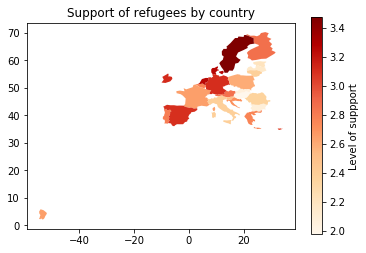

In [22]:
support_map.plot(column='support_refugees_n', legend=True, legend_kwds={'label': "Level of suppport"}, cmap='OrRd').set_title('Support of refugees by country')

### 8.3 Clustering and dimensionality reduction

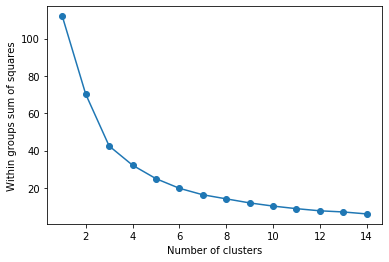

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#select variables for matrix
#We get the average of each variable by country
d3 = d2.groupby(['country'])['support_refugees_n', 'support_migrants_n', 'age', 'educational_n'].mean()
scaler = StandardScaler()
d3_s = scaler.fit_transform(d3) # Scaling the data
# For 1 to 15 cluster centers
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d3_s)
    wss.append(km_out.inertia_)
# Plot total within sum of squares vs. number of clusters
plt.plot(range(1, 15), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

In [24]:
# Compute k-means with k = 3
km_res = KMeans(n_clusters=3, n_init=25).fit(d3_s)
print (km_res)
print("K-means clustering with 3 clusters of sizes ", np.bincount(km_res.labels_[km_res.labels_>=0]))
print ('Cluster means: ', km_res.cluster_centers_)
print ('Clustering vector: \n', np.column_stack((d3.index, km_res.labels_)))
print ('Within cluster sum of squares: ', km_res.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
K-means clustering with 3 clusters of sizes  [13 12  3]
Cluster means:  [[-0.89000978 -0.82574663 -0.3892184  -0.21560025]
 [ 0.66164163  0.64025687 -0.02468681 -0.39044418]
 [ 1.2101425   1.01720791  1.78536032  2.49604445]]
Clustering vector: 
 [['Austria' 1]
 ['Belgium' 1]
 ['Bulgaria' 0]
 ['Croatia' 0]
 ['Cyprus' 1]
 ['Czech republic' 0]
 ['Denmark' 2]
 ['Estonia' 0]
 ['Finland' 2]
 ['France' 1]
 ['Germany' 1]
 ['Greece' 0]
 ['Hungary' 0]
 ['Ireland' 1]
 ['Italy' 0]
 ['Latvia' 0]
 ['Lithuania' 0]
 ['Luxemburg' 1]
 ['Malta' 1]
 ['Netherlands' 1]
 ['Poland' 0]
 ['Portugal' 1]
 ['Romania' 0]
 ['Slovakia' 0]
 ['Slovenia' 0]
 ['Spain' 1]
 ['Sweden' 2]
 ['UK' 1]]
Within cluster sum of squares:  42.50488485460035


No handles with labels found to put in legend.


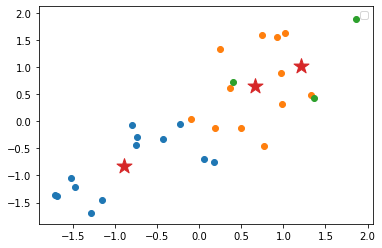

In [25]:
for cluster in range(km_res.n_clusters):
    plt.scatter(d3_s[km_res.labels_ == cluster, 0], d3_s[km_res.labels_ == cluster, 1])
plt.scatter(km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1], s=250, marker='*')
plt.legend(scatterpoints=1)
plt.show()

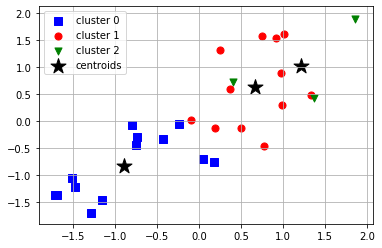

In [26]:
##Visualize the clusters (without for-loop)
plt.scatter(
    d3_s[km_res.labels_ == 0, 0], d3_s[km_res.labels_ == 0, 1],
    s=50, c='blue',
    marker='s', edgecolor='blue',
    label='cluster 0')
plt.scatter(
    d3_s[km_res.labels_ == 1, 0], d3_s[km_res.labels_ == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 1')
plt.scatter(
    d3_s[km_res.labels_ == 2, 0], d3_s[km_res.labels_ == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='green',
    label='cluster 2')
# plot the centroids
plt.scatter(
    km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

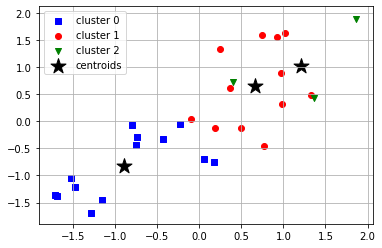

In [27]:
import itertools
markers = itertools.cycle(('s', 'o', 'v')) 
colors = itertools.cycle(('blue', 'red', 'green'))

for cluster in range(km_res.n_clusters):
    plt.scatter(
    d3_s[km_res.labels_ == cluster, 0], d3_s[km_res.labels_ == cluster, 1],
    c=next(colors), marker=next(markers),
    label=f'cluster {cluster}')

# plot the centroids
plt.scatter(
    km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [28]:
# PAM clustering
#Install scikit-learn-extra from https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
#from sklearn_extra.cluster import KMedoids
#pam_res = KMedoids(n_clusters=3).fit(d3_s)

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
hc_res = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete') #more methods: "ward", "average", "single" 
hc_res.fit_predict(d3_s)
print(hc_res)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')


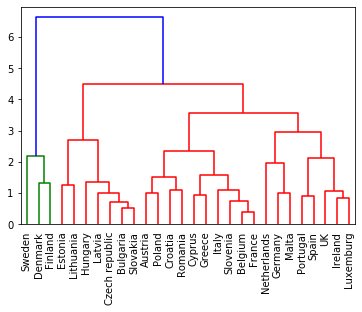

In [30]:
dendrogram = sch.dendrogram(sch.linkage(d3_s, method='complete'), labels=list(d3.index), leaf_rotation=90) 

In [31]:
hc_res = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_res.fit_predict(d3_s)
print(hc_res)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')


No handles with labels found to put in legend.


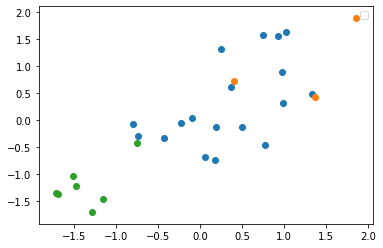

In [32]:
for cluster in range(hc_res.n_clusters):
    plt.scatter(d3_s[hc_res.labels_ == cluster, 0], d3_s[hc_res.labels_ == cluster, 1])
plt.legend(scatterpoints=1)
plt.show()

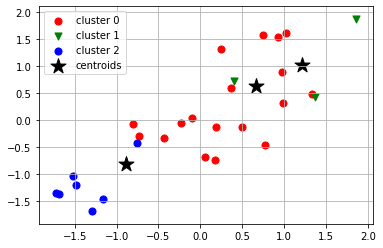

In [33]:
plt.scatter(
    d3_s[hc_res.labels_ == 0, 0], d3_s[hc_res.labels_ == 0, 1],
    s=50, c='red',
    marker='o', edgecolor='red',
    label='cluster 0')
plt.scatter(
    d3_s[hc_res.labels_ == 1, 0], d3_s[hc_res.labels_ == 1, 1],
    s=50, c='green',
    marker='v', edgecolor='green',
    label='cluster 1')
plt.scatter(
    d3_s[hc_res.labels_ == 2, 0], d3_s[hc_res.labels_ == 2, 1],
    s=50, c='blue',
    marker='o', edgecolor='blue',
    label='cluster 2')
# plot the centroids
plt.scatter(
    km_res.cluster_centers_[:, 0], km_res.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [34]:
from sklearn.decomposition import PCA
pca_m = PCA()
pca = pca_m.fit(d3_s)
pca_n = PCA()
pca = pca_n.fit_transform(d3_s)
pca_df = pd.DataFrame(data = pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df.index = d3.index
print(pca_df.head())

pca_df_2 = pd.DataFrame(data = pca_n.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_2.index = d3.columns
print(pca_df_2)

               PC1       PC2       PC3       PC4
country                                         
Austria  -0.103285 -1.220018 -0.535673  0.066888
Belgium  -0.029355 -0.084707  0.051515  0.227609
Bulgaria -1.660518  0.949533 -0.480337 -0.151837
Croatia  -1.267502 -0.819093 -0.920657  0.843682
Cyprus    0.060590 -0.195928  0.573670  0.812519
                         PC1       PC2       PC3       PC4
support_refugees_n  0.573292 -0.369010  0.139859  0.718058
support_migrants_n  0.513586 -0.533140 -0.094283 -0.665659
age                 0.445117  0.558601  0.670994 -0.199005
educational_n       0.457642  0.517261 -0.722023  0.041073


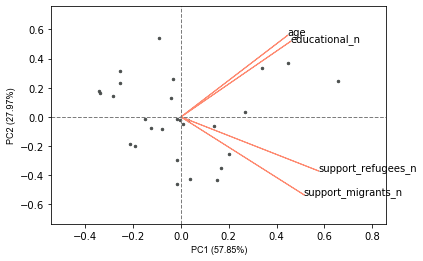

In [35]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca, loadings=pca_n.components_, labels=pca_df_2.index.values, 
               var1=round(pca_n.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca_n.explained_variance_ratio_[1]*100, 2), show=True)

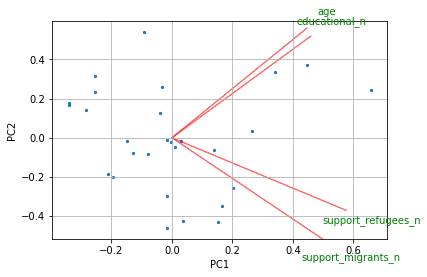

In [36]:
#Adhoc function to create a biplot
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
biplot(pca[:,0:2],np.transpose(pca_n.components_[0:2, :]),list(d3.columns))
plt.show()

In [37]:
print("Proportion of variance explained:", pca_n.explained_variance_ratio_)

Proportion of variance explained: [0.57848569 0.27974794 0.10344996 0.03831642]


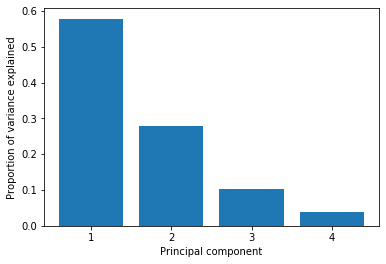

In [38]:
plt.bar(range(1,len(pca_n.explained_variance_ratio_ )+1),pca_n.explained_variance_ratio_ )
plt.ylabel('Proportion of variance explained')
plt.xlabel('Principal component')
plt.xticks(range(1, pca_n.n_components_+1)) # create neat labels
plt.show()

In [39]:
print ("Cumulative explained variance:", np.cumsum(pca_n.explained_variance_ratio_))

Cumulative explained variance: [0.57848569 0.85823362 0.96168358 1.        ]


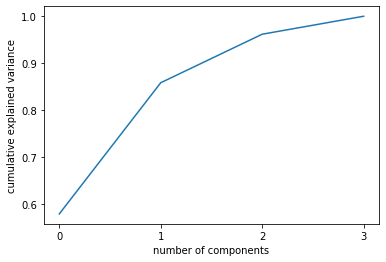

In [40]:
plt.plot(np.cumsum(pca_n.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(range(pca_n.n_components_)) # create neat labels
plt.ylabel('cumulative explained variance') #PC1 begings in 0
plt.show()

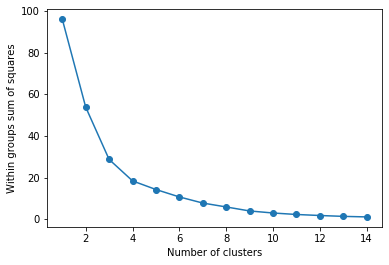

No handles with labels found to put in legend.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
K-means clustering with 3 clusters of sizes  [12  4 12]
Cluster means:  [[-1.263988    0.50511233]
 [ 2.80036141  1.00806107]
 [ 0.33053419 -0.84113269]]
Clustering vector: 
 [['Austria' 2]
 ['Belgium' 2]
 ['Bulgaria' 0]
 ['Croatia' 0]
 ['Cyprus' 2]
 ['Czech republic' 0]
 ['Denmark' 1]
 ['Estonia' 0]
 ['Finland' 1]
 ['France' 2]
 ['Germany' 2]
 ['Greece' 0]
 ['Hungary' 0]
 ['Ireland' 2]
 ['Italy' 0]
 ['Latvia' 0]
 ['Lithuania' 0]
 ['Luxemburg' 2]
 ['Malta' 2]
 ['Netherlands' 1]
 ['Poland' 2]
 ['Portugal' 2]
 ['Romania' 0]
 ['Slovakia' 0]
 ['Slovenia' 0]
 ['Spain' 2]
 ['Sweden' 1]
 ['UK' 2]]
Within cluster sum of squares:  28.65458699781091


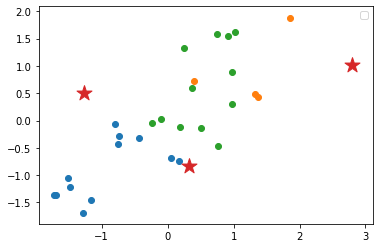

In [41]:
#Generate a new dataset with only two variables (PC1, PC2)
d5 = pca[:,0:2]
d5[0:5]

#Get optimal number of clusters
wss = []
for i in range(1, 15):
    km_out = KMeans(n_clusters=i, n_init=20)
    km_out.fit(d5)
    wss.append(km_out.inertia_)

# Plot total within sum of squares vs. number of clusters
plt.plot(range(1, 15), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within groups sum of squares')
plt.show()

# Compute again k-means with k = 3 and visualize the clusters
km_res_5 = KMeans(n_clusters=3, n_init=25).fit(d5)
print (km_res_5)
print("K-means clustering with 3 clusters of sizes ", np.bincount(km_res_5.labels_[km_res_5.labels_>=0]))
print ('Cluster means: ', km_res_5.cluster_centers_)
print ('Clustering vector: \n', np.column_stack((d3.index, km_res_5.labels_)))
print ('Within cluster sum of squares: ', km_res_5.inertia_)

##Visualize the clusters
for cluster in range(km_res_5.n_clusters):
    plt.scatter(d3_s[km_res_5.labels_ == cluster, 0], d3_s[km_res_5.labels_ == cluster, 1])
plt.scatter(km_res_5.cluster_centers_[:, 0], km_res_5.cluster_centers_[:, 1], s=250, marker='*')
plt.legend(scatterpoints=1)
plt.show()